In [16]:
%matplotlib inline

In [1]:
import tessrip

In [12]:
import lightkurve as lk
import matplotlib.pyplot as plt

# Get a SPOC TPF product

In [99]:
tpf = sr[4].download(quality_bitmask=None)
tpf.shape

(3360, 12, 11)

In [3]:
sr = lk.search_targetpixelfile("Au Mic")
sr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,441420236,0.0
1,TESS Sector 27,2020,SPOC,20,441420236,0.0
2,TESS Sector 27,2020,SPOC,120,441420236,0.0
3,TESS Sector 01,2018,TESS-SPOC,1800,441420236,0.0
4,TESS Sector 27,2020,TESS-SPOC,600,441420236,0.0


In [94]:
tpf.sector, tpf.camera, tpf.ccd

(27, 1, 3)

In [95]:
tpf.column, tpf.row, tpf.shape

(471, 1242, (3508, 12, 11))

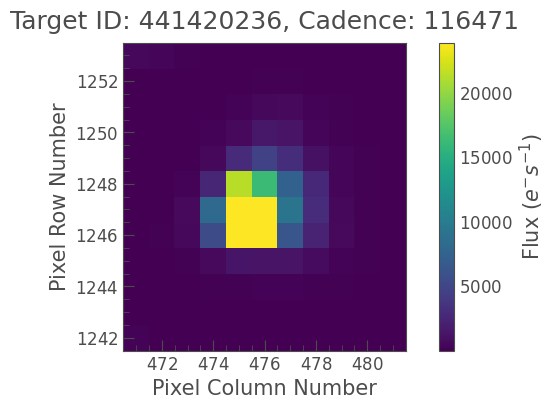

In [15]:
tpf.plot()
plt.show()

# Get a TESSrip at the same location

In [106]:
rip = tessrip.Rip(tpf.sector, tpf.camera, tpf.ccd)
rip

In [107]:
len(rip.ffi_names)

3360

In [112]:
rip_tpf = rip.get_tpf(
        corner  = (tpf.row, tpf.column),
        shape = (tpf.shape[1], tpf.shape[2]),
        frame_range = None,
    )



In [113]:
rip_tpf = lk.TessTargetPixelFile(rip_tpf, quality_bitmask=None)

<Axes: title={'center': 'Target ID: None, Cadence: 1'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

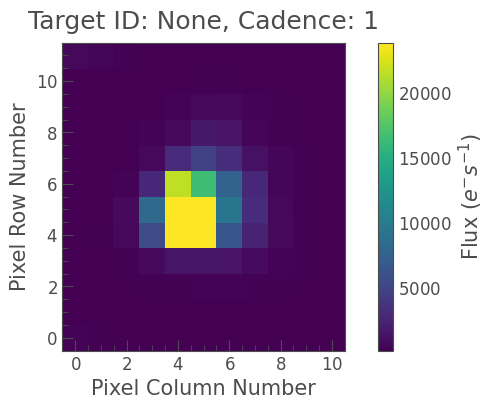

In [114]:
rip_tpf.plot()

In [115]:
print(tpf.sector, tpf.camera, tpf.ccd)
print(rip_tpf.sector, rip_tpf.camera, rip_tpf.ccd)

27 1 3
27 1 3


In [116]:
# rip_tpf column/ row are not filled in. Also there is one bonus image. 
print(tpf.column, tpf.row, tpf.shape)
print(rip_tpf.column, rip_tpf.row, rip_tpf.shape)

471 1242 (3360, 12, 11)
0 0 (3360, 12, 11)


In [86]:
for key in tpf.get_header(ext=0).keys():
    if key not in rip_tpf.get_header(ext=0):
        #print(' ')
        print(f"{key} NOT IN TESSRIP")
        #print(' ')
    else:
        if tpf.get_header(ext=0)[key] != rip_tpf.get_header(ext=0)[key]:
            #print(f"{key} matches")
        #else:
            print(f"{key}: {tpf.get_header(ext=0)[key]} {rip_tpf.get_header(ext=0)[key]} ")

NEXTEND: 3 2 
ORIGIN: NASA/Ames STScI/MAST 
DATE: 2020-09-28 2020-09-25 
TSTART: 2036.28333644747 2036.283478026662 
TSTOP: 2060.644815473294 2060.644819610229 
DATE-OBS: 2020-07-05T18:46:51.085 2020-07-05T18:47:03.318 
DATE-END: 2020-07-30T03:27:22.873 2020-07-30T03:27:23.230 
CREATOR: 37157 TargetPixelExporterPipelineModule tessrip 
PROCVER: spoc-5.0.12-20200925 0.1.0dev 
OBJECT: TIC 441420236  
TICID: 441420236 None 
PXTABLE: -10000 0 
RA_OBJ NOT IN TESSRIP
DEC_OBJ NOT IN TESSRIP
PMRA: 281.424 0.0 
PMDEC: -359.895 0.0 
PMTOTAL: 456.8630854 0.0 
TESSMAG: 6.75500011 0.0 
TEFF: None 0.0 
LOGG: 4.57124996 0.0 
MH: None 0.0 
RADIUS: 0.69800901 0.0 
TICVER: 8.1 0 
CHECKSUM NOT IN TESSRIP


In [46]:
rip_tpf.get_header(ext=0)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'STScI/MAST'         / institution responsible for creating this file 
DATE    = '2020-09-25'         / file creation date.                            
TSTART  =    2036.283478026662 / observation start time in BTJD                 
TSTOP   =    2060.644819610229 / observation stop time in BTJD                  
DATE-OBS= '2020-07-05T18:47:

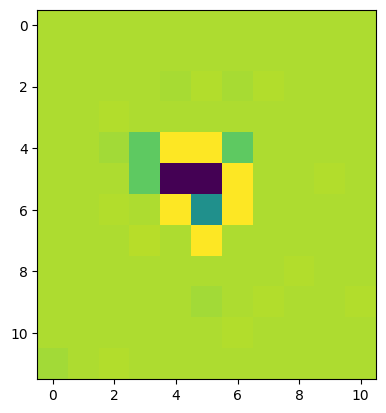

In [76]:
plt.imshow(tpf.flux[0,:,:].value - rip_tpf.flux[1,:,:].value)

# Time are in different units

In [87]:
tpf.time[0:5]

<Time object: scale='tdb' format='btjd' value=[2036.29375332 2036.30069798 2036.30764264 2036.3145873  2036.32153196]>

In [88]:
rip_tpf.time[0:5]

<Time object: scale='tdb' format='jd' value=[2036.28695013 2036.29389475 2036.30083937 2036.30778399 2036.31472861]>

In [103]:
tpf.get_header(ext=2)

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   11                                                  
NAXIS2  =                   12                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'APERTURE'           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 